In [1]:
import os
os.chdir("C:\DilipKumar\Machine Learning\KaggleCompetition\TitanicSurvival")

In [2]:
print(os.getcwd())

C:\DilipKumar\Machine Learning\KaggleCompetition\TitanicSurvival


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset & observe top 5 rows
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Observe the last 5 rows
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Load Test dataset and observe top 5 rows
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# check the column info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check the train data statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#check the train data no.of rows & no. of columns
train_df.shape

(891, 12)

In [10]:
#check the test data no.of rows & no. of columns
test_df.shape

(418, 11)

In [11]:
#check the null values
train_df.isnull().values.any()

True

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Age, Cabin and Embarked have null values

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
train_df[train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [17]:
train_df[train_df['Age'].isnull() & train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [18]:
#extract the categorical features
categorical = [var for var in train_df.columns if train_df[var].dtype == 'O']
print("There are {} categorical variables in train dataset".format(len(categorical)))
print("The categorical columns are : ",categorical)

There are 5 categorical variables in train dataset
The categorical columns are :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [19]:
numerical = list(set(train_df.columns) - set(categorical))

In [20]:
#extract the numerical features
#numerical = [var for var in train_df.columns if train_df[var].dtype != 'O']
print("There are {} numerical variables in train dataset".format(len(numerical)))
print("The numerical columns are : ",numerical)

There are 7 numerical variables in train dataset
The numerical columns are :  ['Fare', 'Parch', 'Survived', 'SibSp', 'Age', 'PassengerId', 'Pclass']


In [21]:
#check frequency table of categorical variables / features
for var in categorical:
    print(train_df[var].value_counts())

Murdlin, Mr. Joseph                              1
Bradley, Mr. George ("George Arthur Brayton")    1
Connolly, Miss. Kate                             1
Mangan, Miss. Mary                               1
Jussila, Miss. Katriina                          1
                                                ..
Sandstrom, Miss. Marguerite Rut                  1
Lefebre, Miss. Jeannie                           1
Stankovic, Mr. Ivan                              1
Harper, Mrs. Henry Sleeper (Myna Haxtun)         1
Chapman, Mr. Charles Henry                       1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
347082               7
CA. 2343             7
1601                 7
3101295              6
347088               6
                    ..
349239               1
250648               1
234686               1
110564               1
SOTON/O.Q. 392078    1
Name: Ticket, Length: 681, dtype: int64
G6             4
C23 C25 C27    4
B96 B98        4
E101 

In [22]:
#check frequency of target variable
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
# percentage distribution 
train_df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [24]:
#check if null values are present in categorical features
for var in categorical:
    print(var, train_df[var].isnull().sum())

Name 0
Sex 0
Ticket 0
Cabin 687
Embarked 2


In [25]:
# Inspect null value count of 'Cabin'
train_df['Cabin'].isnull().sum()

687

In [26]:
# Inspect Cabin further, it shows non null values = 204 and null values = 687
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

array([[<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Survived'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'PassengerId'}>],
       [<AxesSubplot:title={'center':'Pclass'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

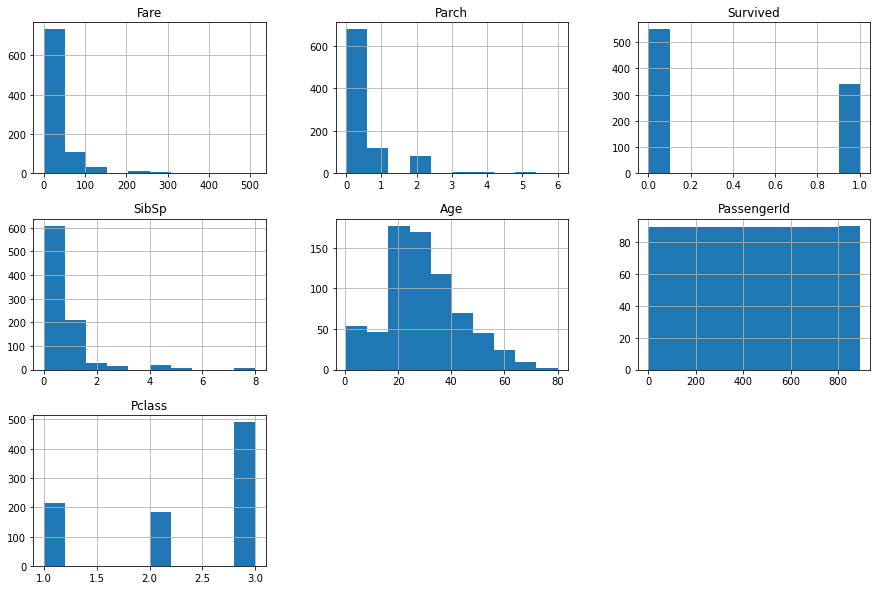

In [27]:
# Visualization & Analysis
# Univariate Analysis
# Quantitative variables
# Histogram
train_df[numerical].hist(figsize=(15,10))

In [28]:
#from above plots, we can infer that Age of the passengers were skewed right and most of the age group between 20 to 30

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

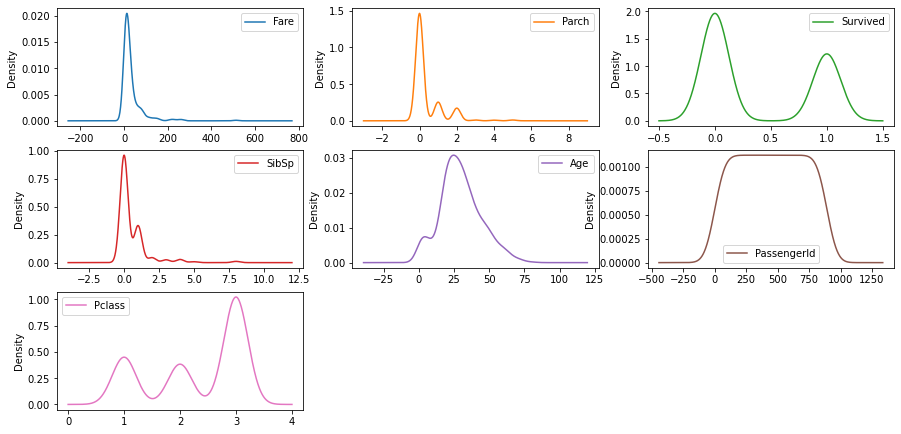

In [29]:
#Density plots
train_df[numerical].plot(
    kind = "density", subplots = True, layout = (4,3), sharex = False, figsize = (15,10)
)

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

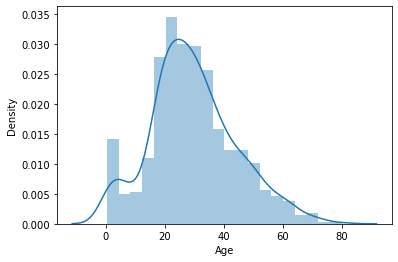

In [30]:
#Distribution plot using Seaborn
sns.distplot(train_df['Age'])

<AxesSubplot:xlabel='Fare'>

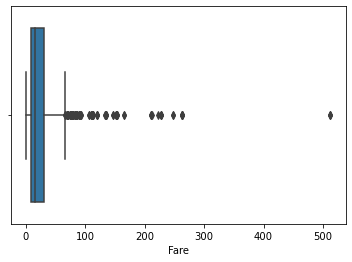

In [31]:
#Bot plot using seaborn
sns.boxplot(x = 'Fare', data = train_df)

In [32]:
# Fare has some outliers

<AxesSubplot:xlabel='Embarked', ylabel='count'>

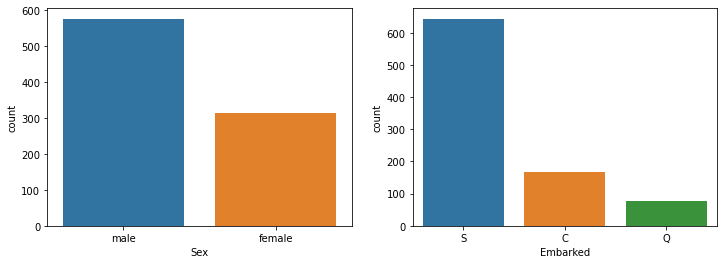

In [33]:
# Categorical variables
# Barplot
_, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12,4))
sns.countplot(x="Sex",data=train_df,ax=axes[0])
sns.countplot(x="Embarked",data=train_df,ax=axes[1])

<AxesSubplot:>

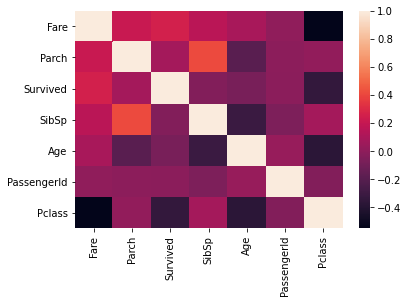

In [34]:
#Multivariate plots
#Quantitative vs Quantitative
#Correlation matrix
corr_matrix = train_df[numerical].corr()
sns.heatmap(corr_matrix)

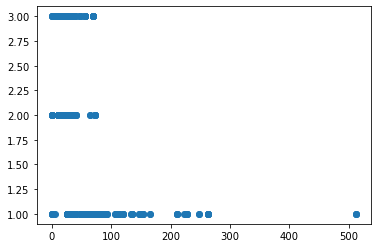

In [35]:
#Scatter plot
plt.scatter(train_df["Fare"],train_df["Pclass"])

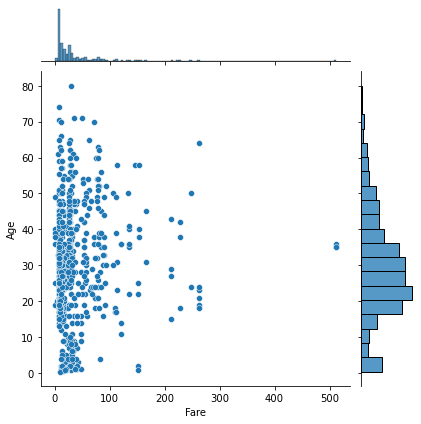

In [36]:
#Jointplot
sns.jointplot(x="Fare",y="Age",data=train_df,kind="scatter")

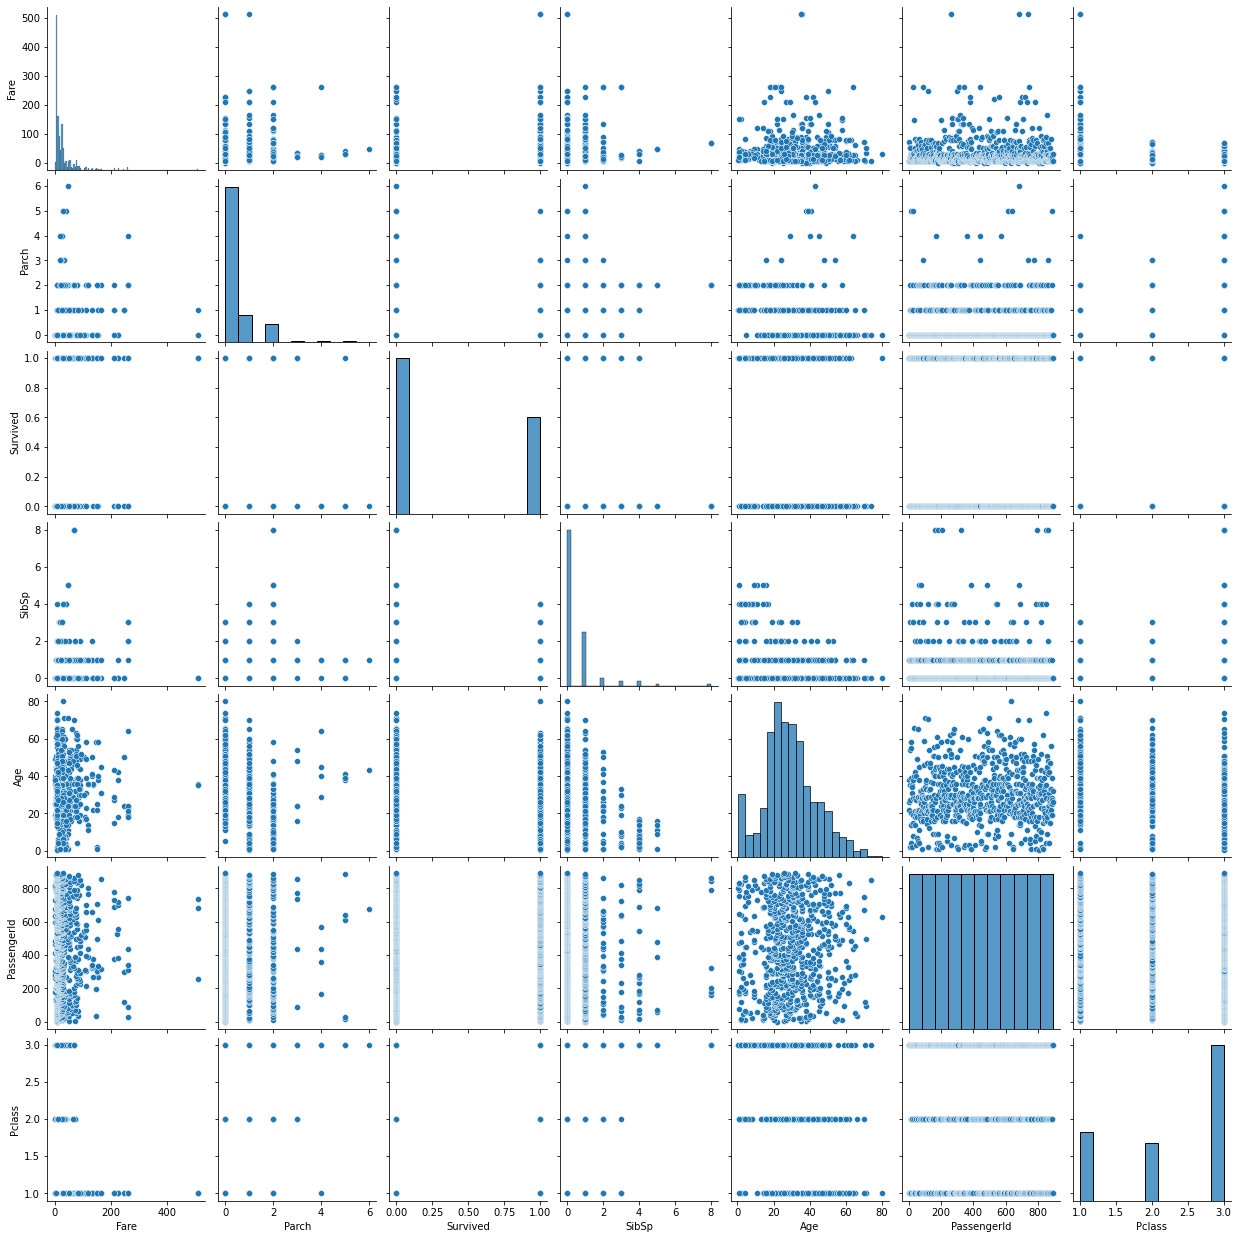

In [37]:
#scatterplot matrix
%config InlineBackend.figure_format = 'png'
sns.pairplot(train_df[numerical]);

In [38]:
%config InlineBackend.figure_format = 'retina'

C:\Users\dilip-k\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


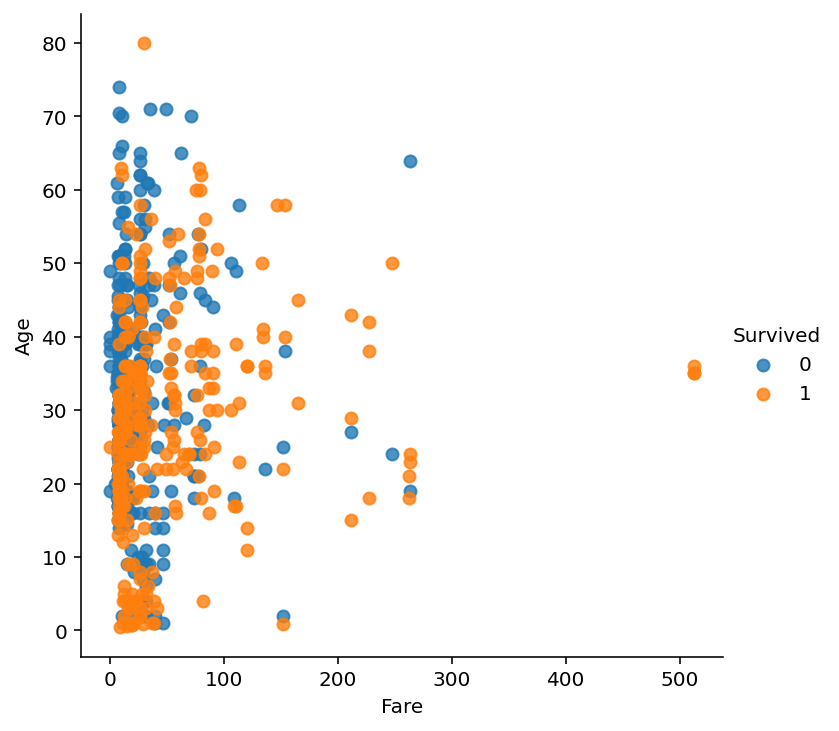

In [39]:
#Quantitative vs Categorical
sns.lmplot("Fare","Age",data=train_df,hue="Survived",fit_reg=False)

<AxesSubplot:xlabel='Sex', ylabel='count'>

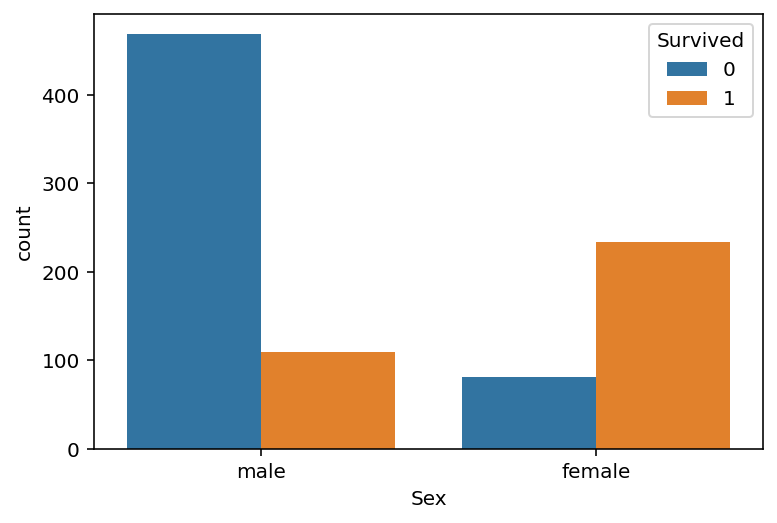

In [40]:
#Categorical vs Categorical
sns.countplot(x="Sex",hue="Survived",data=train_df)

<AxesSubplot:xlabel='Fare', ylabel='count'>

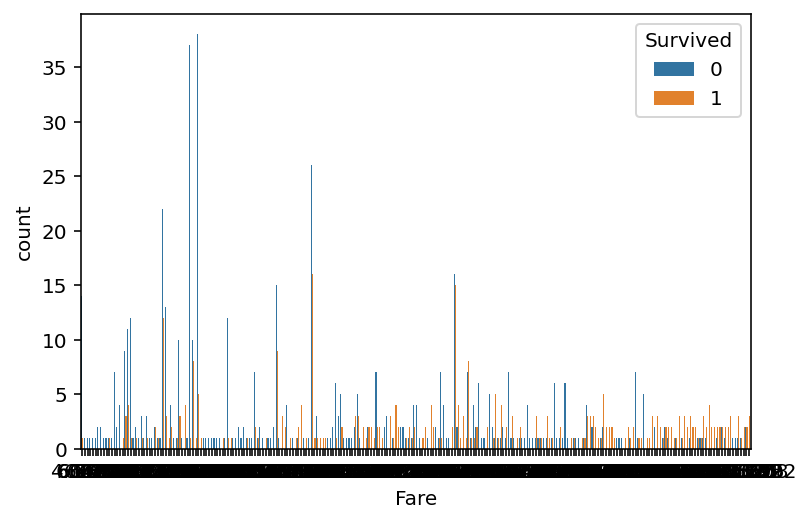

In [41]:
sns.countplot(x="Fare",hue="Survived",data=train_df)

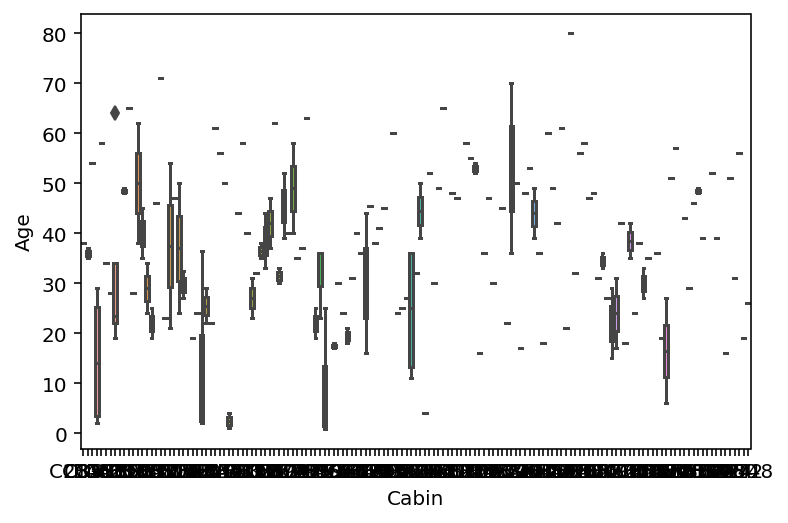

In [42]:
sns.boxplot(x='Cabin',y='Age',data=train_df)
plt.show()

In [43]:
#Feature Engineering
# Handle missing values
# Age has missing values and needs to be checked
train_df['Age'].isnull().sum()

177

In [44]:
test_df['Age'].isnull().sum()

86

In [45]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [46]:
#check the most frequent Age value
train_df['Age'].mode()[0]

24.0

In [47]:
# replace Null values with mode
mode = train_df['Age'].mode()[0]
train_df['Age'].fillna(mode,inplace=True)

In [48]:
# similarly handle null values for Age column in Test Data
mode = test_df['Age'].mode()[0]
test_df['Age'].fillna(mode,inplace=True)

In [49]:
train_df['Age'].isnull().sum()

0

In [50]:
test_df['Age'].isnull().sum()

0

In [51]:
#Age is handled, now check Cabin
train_df['Cabin'].isnull().sum()

687

In [52]:
train_df[train_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S


In [53]:
mode = train_df['Cabin'].mode()[0]
train_df['Cabin'].fillna(mode,inplace=True)

In [54]:
mode = test_df['Cabin'].mode()[0]
test_df['Cabin'].fillna(mode,inplace=True)

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [56]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked        True
dtype: bool

In [57]:
# Embarked has also null values. Again this is not significant to decide if survived or not, so we can drop this column
mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(mode,inplace=True)

In [58]:
train_df.isnull().any().sum()

0

In [59]:
test_df.isnull().any().sum()

1

In [60]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [61]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B57 B59 B63 B66,S


In [62]:
test_df['Fare'].fillna(test_df[test_df['Pclass'] == 3]['Fare'].mean(),inplace=True)

In [63]:
#drop PassengerID column as well
train_df.drop(columns='PassengerId',axis = 1, inplace=True)
test_df.drop(columns='PassengerId',axis = 1, inplace=True)

In [64]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [65]:
#Split the name and fetch the title alone. There can be relation between so & so person and survival
Title = train_df['Name'].str.split(" ")
Title

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3      [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [66]:
Title[888][1]

'Miss.'

In [67]:
train_df['Title'] = train_df['Name']

In [68]:
for i in range(0, len(Title)):
    train_df['Title'][i] = Title[i][1]

<ipython-input-68-9cbf9abc7b8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Title'][i] = Title[i][1]


In [69]:
train_df['Title']

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [70]:
#Now title has been extracted
train_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,B96 B98,S,Rev.
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss.
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,B96 B98,S,Miss.
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr.
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,B96 B98,Q,Mr.


In [71]:
Title = test_df['Name'].str.split(" ")
test_df['Title'] = train_df['Name']
for i in range(0, len(Title)):
    test_df['Title'][i] = Title[i][1]

<ipython-input-71-1053c4eec6d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Title'][i] = Title[i][1]


In [72]:
#Drop Name column
train_df.drop(columns='Name',axis=1,inplace=True)

In [73]:
test_df.drop(columns='Name',axis=1,inplace=True)

In [74]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr.
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss.
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S,Mr.


In [75]:
train_df.iloc[:,4:7]

,SibSp,Parch,Ticket
0,1,0,A/5 21171
1,1,0,PC 17599
2,0,0,STON/O2. 3101282
3,1,0,113803
4,0,0,373450
...,...,...,...
886,0,0,211536
887,0,0,112053
888,1,2,W./C. 6607
889,0,0,111369


In [76]:
# Ticket number with prefix mostly relates to SibSp or Parch so it can be ignored, drop Ticket column
train_df.drop(columns = 'Ticket', axis = 1, inplace = True)

In [77]:
test_df.drop(columns = 'Ticket', axis = 1, inplace = True)

In [78]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch']

In [79]:
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

In [80]:
train_df.drop(columns=['SibSp','Parch'],axis=1, inplace = True)

In [81]:
test_df.drop(columns=['SibSp','Parch'],axis=1, inplace = True)

In [82]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,male,22.0,7.2500,B96 B98,S,Mr.,1
1,1,1,female,38.0,71.2833,C85,C,Mrs.,1
2,1,3,female,26.0,7.9250,B96 B98,S,Miss.,0
3,1,1,female,35.0,53.1000,C123,S,Mrs.,1
4,0,3,male,35.0,8.0500,B96 B98,S,Mr.,0


In [83]:
train_df['Age'] = pd.qcut(train_df['Age'],10,duplicates = 'drop')

In [84]:
test_df['Age'] = pd.qcut(test_df['Age'],10,duplicates = 'drop')

In [85]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,male,"(20.0, 24.0]",7.2500,B96 B98,S,Mr.,1
1,1,1,female,"(32.5, 38.0]",71.2833,C85,C,Mrs.,1
2,1,3,female,"(24.0, 28.0]",7.9250,B96 B98,S,Miss.,0
3,1,1,female,"(32.5, 38.0]",53.1000,C123,S,Mrs.,1
4,0,3,male,"(32.5, 38.0]",8.0500,B96 B98,S,Mr.,0


In [86]:
test_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,3,male,"(31.9, 39.0]",7.8292,B57 B59 B63 B66,Q,Mr.,0
1,3,female,"(39.0, 48.0]",7.0000,B57 B59 B63 B66,S,Mrs.,1
2,2,male,"(48.0, 76.0]",9.6875,B57 B59 B63 B66,Q,Mr.,0
3,3,male,"(24.0, 27.0]",8.6625,B57 B59 B63 B66,S,Mr.,0
4,3,female,"(21.0, 24.0]",12.2875,B57 B59 B63 B66,S,Mrs.,2


In [87]:
train_df['Age'].value_counts()

(20.0, 24.0]     275
(0.419, 16.0]    100
(47.0, 80.0]      89
(32.5, 38.0]      89
(38.0, 47.0]      88
(28.0, 32.5]      86
(24.0, 28.0]      85
(16.0, 20.0]      79
Name: Age, dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
train_df['Age'] = LabelEncoder().fit_transform(train_df['Age'])

In [89]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,male,2,7.2500,B96 B98,S,Mr.,1
1,1,1,female,5,71.2833,C85,C,Mrs.,1
2,1,3,female,3,7.9250,B96 B98,S,Miss.,0
3,1,1,female,5,53.1000,C123,S,Mrs.,1
4,0,3,male,5,8.0500,B96 B98,S,Mr.,0


In [90]:
from sklearn.preprocessing import LabelEncoder
test_df['Age'] = LabelEncoder().fit_transform(test_df['Age'])

In [91]:
train_df['Cabin'] = LabelEncoder().fit_transform(train_df['Cabin'])

In [92]:
test_df['Cabin'] = LabelEncoder().fit_transform(test_df['Cabin'])

In [93]:
test_df.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,3,male,5,7.8292,15,Q,Mr.,0
1,3,female,6,7.0000,15,S,Mrs.,1
2,2,male,7,9.6875,15,Q,Mr.,0
3,3,male,3,8.6625,15,S,Mr.,0
4,3,female,2,12.2875,15,S,Mrs.,2


In [94]:
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])

In [95]:
train_df['Title'] = LabelEncoder().fit_transform(train_df['Title'])
test_df['Title'] = LabelEncoder().fit_transform(test_df['Title'])

In [96]:
train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])
test_df['Embarked'] = LabelEncoder().fit_transform(test_df['Embarked'])

In [97]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,1,2,7.2500,47,2,17,1
1,1,1,0,5,71.2833,81,0,18,1
2,1,3,0,3,7.9250,47,2,14,0
3,1,1,0,5,53.1000,55,2,18,1
4,0,3,1,5,8.0500,47,2,17,0


In [98]:
train_df.shape,test_df.shape

((891, 9), (418, 8))

In [99]:
test_df['Survived'] = np.nan

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [102]:
X = train_df.drop('Survived',axis = 1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [103]:
sc = StandardScaler()

In [104]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
#Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier,ExtraTreeClassifier)
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, 
GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [106]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [107]:
clf = [KNeighborsClassifier(n_neighbors=13),DecisionTreeClassifier(),
      RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),
      ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10,learning_rate=1,max_features=3,max_depth=3,random_state=10),
                                 AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i],X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
        print("Score of Model",clf[i],":",round(np.mean(score)*100,2))
model_fit()

Score of Model KNeighborsClassifier(n_neighbors=13) : 80.73
Score of Model DecisionTreeClassifier() : 80.24
Score of Model RandomForestClassifier(n_estimators=13) : 81.53
Score of Model GaussianNB() : 78.32
Score of Model SVC() : 82.83
Score of Model ExtraTreeClassifier() : 79.46
Score of Model GradientBoostingClassifier(learning_rate=1, max_features=3, n_estimators=10,
                           random_state=10) : 80.57
Score of Model AdaBoostClassifier() : 82.35
Score of Model ExtraTreesClassifier() : 81.05


In [108]:
clf1 = SVC()
clf1.fit(X_train,y_train)
prediction = clf1.predict(X_test)

In [109]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction))

Confusion Matrix:
 [[137  20]
 [ 27  84]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.81      0.76      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



In [111]:
passengerdf = pd.read_csv('test.csv')
final_preds = clf1.predict(test_df.drop(columns='Survived'))

In [112]:
final_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [113]:
submission_df = pd.DataFrame(columns=['PassengerId','Survived'])
submission_df['PassengerId'] = passengerdf['PassengerId']
submission_df['Survived'] = final_preds

In [114]:
submission_df.to_csv('submissions_ver2.csv', header=True, index=False)

In [115]:
submission_df.shape

(418, 2)